# Car Accidents Classification Project

## Data Preprocessing

#### Load Data 

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

In [99]:
data = pd.read_csv('accidents.csv')
data

pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0      2023000009       1           1            2          8600       719.0   
1      2023000011       1           1            2          9700         NaN   
2      2023000013       1           1            2          8300       120.0   
3      2023000014       1           1            3             0         NaN   
4      2023000021       1           1            2          3000      4121.0   
...             ...      ...            ...        ...           ...     ...   
8827   2023099950       1           1            2          3000      4763.0   
8828   2023099951       1           1            2          5000       116.0   
8829   2023099957       1           1            1          6600       751.0   
8830   2023099981       1           1            4             0         NaN   
8831   2023099996       1           1            4             0         NaN   

      REHOV2   BAYIT  ZOMET_IRONI  KVISH1  KVISH2    KM    ZOMET_LO_IRONI  \
0        NaN   104.0         NaN      NaN    NaN      NaN         NaN       
1        NaN  9999.0         NaN      NaN    NaN      NaN         NaN       
2        NaN  9999.0         NaN      NaN    NaN      NaN         NaN       
3        NaN     NaN         NaN      4.0    0.0   2236.0      3402.0       
4        NaN  9999.0         NaN      NaN    NaN      NaN         NaN       
...      ...     ...          ...     ...     ...     ...             ...   
8827     NaN     2.0         NaN      NaN    NaN      NaN         NaN       
8828     NaN    93.0         NaN      NaN    NaN      NaN         NaN       
8829   736.0     NaN  11100356.0      NaN    NaN      NaN         NaN       
8830     NaN     NaN         NaN      4.0    0.0   1170.0         NaN       
8831     NaN     NaN         NaN    807.0    0.0     61.0         NaN       

      YEHIDA  SHNAT_TEUNA  HODESH_TEUNA  SHAA  SUG_YOM  YOM_LAYLA  \
0       20       2023            4        37      3         1       
1       51       2023            5        81      4         5       
2       52       2023            7        67      4         1       
3       12       2023            1        50      4         1       
4       61       2023            6        69      4         1       
...      ...          ...           ...   ...      ...        ...   
8827    61       2023            4        70      3         1       
8828    20       2023            7        46      4         1       
8829    20       2023            4        67      4         1       
8830    20       2023            5        17      4         5       
8831    12       2023            8        45      4         1       

      YOM_BASHAVUA  HUMRAT_TEUNA  SUG_TEUNA  HAD_MASLUL  RAV_MASLUL  \
0           1             3           3           3           0       
1           1             2           1           1           0       
2           4             2           3           9           0       
3           5             2           2           3           0       
4           4             3           3           3           0       
...            ...           ...        ...         ...         ...   
8827        7             3           2           3           0       
8828        4             3           3           0           3       
8829        4             3           1           0           2       
8830        3             2           8           1           0       
8831        1             2           4           3           0       

      MEHIRUT_MUTERET  TKINUT  ROHAV  SIMUN_TIMRUR  TEURA  MEZEG_AVIR  \
0            1            1      3          3         1         1       
1            1            1      2          3         3         9       
2            0            0      0          5        11         9       
3            2            1      2          3         1         1       
4            1            1      2          5         1         1       


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pk_teuna_fikt      8832 non-null   int64  
 1   sug_tik            8832 non-null   int64  
 2   THUM_GEOGRAFI      8832 non-null   int64  
 3   SUG_DEREH          8832 non-null   int64  
 4   SEMEL_YISHUV       8832 non-null   int64  
 5   REHOV1             5367 non-null   float64
 6   REHOV2             2684 non-null   float64
 7   BAYIT              2989 non-null   float64
 8   ZOMET_IRONI        2684 non-null   float64
 9   KVISH1             3081 non-null   float64
 10  KVISH2             3021 non-null   float64
 11  KM                 3066 non-null   float64
 12  ZOMET_LO_IRONI     1304 non-null   float64
 13  YEHIDA             8832 non-null   int64  
 14  SHNAT_TEUNA        8832 non-null   int64  
 15  HODESH_TEUNA       8832 non-null   int64  
 16  SHAA               8832 

#### Import Key Table and merge for values of each code column

In [101]:
keys = pd.read_csv('Key Table.csv')
keys.rename(columns={'קוד': 'code'}, inplace=True)
keys.rename(columns={'מאפיינים': 'value'}, inplace=True)
keys

מקור                          value                  code  \
0                        NaN                            ת"ד מורחב   1.0   
1                        NaN             ישראל ללא\nיהודה ושומרון   1.0   
2                        NaN                       יהודה והשומרון   2.0   
3                        NaN                         עירוני בצומת   1.0   
4                        NaN                      עירוני לא בצומת   2.0   
5                        NaN                      לא עירוני בצומת   3.0   
6                        NaN                  לא עירוני לא\nבצומת   4.0   
7                        NaN                                  NaN   NaN   
8               מילון רחובות                                  NaN   NaN   
9               מילון רחובות                                  NaN   NaN   
10                       NaN                                  NaN   NaN   
11      מילון צמתים עירוניים                                  NaN   NaN   
12                       NaN                                  NaN   NaN   
13                       NaN                                  NaN   NaN   
14                       NaN                                  NaN   NaN   
15   מילון צמתים לא עירוניים                                  NaN   NaN   
16                       NaN                      מרחב חוף (חיפה)  11.0   
17                       NaN                            מרחב גליל  12.0   
18                       NaN                           מרחב עמקים  14.0   
19                       NaN                             מרחב ת"א  20.0   
20                       NaN                            מרחב אילת  33.0   
21                       NaN                            מרחב הנגב  34.0   
22                       NaN                מרחב שמשון (עד\n1999)  36.0   
23                       NaN             מרחב שמשון\n(החל ב-2004)  37.0   
24                       NaN                            מרחב לכיש  38.0   
25                       NaN                          מרחב שומרון  41.0   
26                       NaN                           מרחב יהודה  43.0   
27                       NaN                           מרחב השרון  51.0   
28                       NaN                           מרחב השפלה  52.0   
29                       NaN                         מחוז ירושלים  61.0   
30                       NaN                                  NaN   NaN   
31         מילון-טבלה מס' 60                                  NaN   NaN   
32         מילון-טבלה מס' 97                                  NaN   NaN   
33         מילון-טבלה מס' 93                                  NaN   NaN   
34                       NaN                                   חג   1.0   
35                       NaN                               ערב חג   2.0   
36                       NaN                            חול המועד   3.0   
37                       NaN                              יום אחר   4.0   
38                       NaN                                  יום   1.0   
39                       NaN                                 לילה   5.0   
40                       NaN                                ראשון   1.0   
41                       NaN                                  שני   2.0   
42                       NaN                                שלישי   3.0   
43                       NaN                                רביעי   4.0   
44                       NaN                                חמישי   5.0   
45                       NaN                                 שישי   6.0   
46                       NaN                                  שבת   7.0   
47                       NaN                                   לא   0.0   
48                       NaN                                   כן   1.0   
49                       NaN                              לא ידוע   9.0   
50                       NaN                               קטלנית   1.0   
51                       NaN                                  קשה   2.0   
52                       NaN           

In [102]:
# Step 1: Pivot the first table so that "שם משתנה" becomes columns

df1_piv = data.melt(id_vars=['pk_teuna_fikt'], var_name='שם משתנה', value_name='code')
df1_piv


pk_teuna_fikt שם משתנה    code  
0        2023000009    sug_tik       1.0
1        2023000011    sug_tik       1.0
2        2023000013    sug_tik       1.0
3        2023000014    sug_tik       1.0
4        2023000021    sug_tik       1.0
...               ...      ...       ...
388603   2023099950          Y  637964.0
388604   2023099951          Y  669710.0
388605   2023099957          Y  657953.0
388606   2023099981          Y  664592.0
388607   2023099996          Y  751662.0

[388608 rows x 3 columns]

In [103]:
# merge tables
key_columns = ['code','שם משתנה']
value_column = 'value'  
merged_table = df1_piv.merge(keys[key_columns + [value_column]], on=key_columns, how='left')

In [104]:
merged_table[merged_table["שם משתנה"]=="SUG_TEUNA"]

pk_teuna_fikt  שם משתנה   code        value        
176640   2023000009    SUG_TEUNA   3.0  התנגשות חזית\nבאחור
176641   2023000011    SUG_TEUNA   1.0      פגיעה בהולך רגל
176642   2023000013    SUG_TEUNA   3.0  התנגשות חזית\nבאחור
176643   2023000014    SUG_TEUNA   2.0  התנגשות חזית\nאל צד
176644   2023000021    SUG_TEUNA   3.0  התנגשות חזית\nבאחור
...               ...        ...   ...                  ...
185467   2023099950    SUG_TEUNA   2.0  התנגשות חזית\nאל צד
185468   2023099951    SUG_TEUNA   3.0  התנגשות חזית\nבאחור
185469   2023099957    SUG_TEUNA   1.0      פגיעה בהולך רגל
185470   2023099981    SUG_TEUNA   8.0  התנגשות עם עצם דומם
185471   2023099996    SUG_TEUNA   4.0       התנגשות צד בצד

[8832 rows x 4 columns]

In [105]:
# Pivot the merged DataFrame to get "code" and "value" for each "שם משתנה"
pivot_df = merged_table.pivot_table(index=['pk_teuna_fikt'], 
                                 columns='שם משתנה', 
                                 values=['value', 'code'], 
                                 aggfunc=lambda x: ' '.join(x.astype(str)))

In [106]:
pivot_df

code                                                  \
שם משתנה       BAYIT  EZOR_TIVI HAD_MASLUL HODESH_TEUNA HUMRAT_TEUNA   
pk_teuna_fikt                                                          
2023000009      104.0    512.0      3.0         4.0          3.0       
2023000011     9999.0    421.0      1.0         5.0          2.0       
2023000013     9999.0    442.0      9.0         7.0          2.0       
2023000014        nan    311.0      3.0         1.0          2.0       
2023000021     9999.0    111.0      3.0         6.0          3.0       
...               ...       ...        ...          ...          ...   
2023099950        2.0    111.0      3.0         4.0          3.0       
2023099951       93.0    511.0      0.0         7.0          3.0       
2023099957        nan    513.0      0.0         4.0          3.0       
2023099981        nan    512.0      1.0         5.0          2.0       
2023099996        nan    222.0      3.0         8.0          2.0       

                                                                            \
שם משתנה      KIVUN_HAZIYA    KM   KVISH1 KVISH2 LO_HAZA MAAMAD_MINIZIPALI   
pk_teuna_fikt                                                                
2023000009         9.0         nan    nan   nan     9.0          0.0         
2023000011         9.0         nan    nan   nan     6.0          0.0         
2023000013         9.0         nan    nan   nan     9.0          0.0         
2023000014         9.0      2236.0    4.0   0.0     9.0         99.0         
2023000021         9.0         nan    nan   nan     9.0          0.0         
...                    ...     ...    ...    ...     ...               ...   
2023099950         9.0         nan    nan   nan     9.0          0.0         
2023099951         9.0         nan    nan   nan     9.0          0.0         
2023099957         9.0         nan    nan   nan     9.0          0.0         
2023099981         9.0      1170.0    4.0   0.0     9.0         99.0         
2023099996         9.0        61.0  807.0   0.0     9.0         99.0         

                                                                               \
שם משתנה      MAHOZ MEHIRUT_MUTERET MEKOM_HAZIYA MERHAK_EZEM MEZEG_AVIR  NAFA   
pk_teuna_fikt                                                                   
2023000009      5.0        1.0           0.0          9.0        1.0     51.0   
2023000011      4.0        1.0           0.0          9.0        9.0     42.0   
2023000013      4.0        0.0           0.0          9.0        9.0     44.0   
2023000014      3.0        2.0           0.0          9.0        1.0     31.0   
2023000021      1.0        1.0           0.0          9.0        1.0     11.0   
...             ...             ...          ...         ...        ...   ...   
2023099950      1.0        1.0           0.0          9.0        1.0     11.0   
2023099951      5.0        1.0           0.0          9.0        1.0     51.0   
2023099957      5.0        1.0           3.0          9.0        1.0     51.0   
2023099981      5.0        6.0           0.0          9.0        1.0     51.0   
2023099996      2.0        4.0           0.0          9.0        1.0     22.0   

                                                                     \
שם משתנה      OFEN_HAZIYA PNE_KVISH RAV_MASLUL  REHOV1 REHOV2 ROHAV   
pk_teuna_fikt                                                         
2023000009         0.0        1.0       0.0      719.0    nan   3.0   
2023000011         8.0        9.0       0.0        nan    nan   2.0   
2023000013         0.0        9.0       0.0      120.0    nan   0.0   
2023000014         0.0        1.0       0.0        nan    nan   2.0   
2023000021         0.0        1.0       0.0     4121.0    nan   2.0   
...                   ...       ...        ...     ...    ...   ...   
2023099950         0.0        1.0       0.0     4763.0    nan   2.0   
2023099951         0.0        1.0       3.0      116.0    nan   3.0  

In [107]:
#Flatten the multi-level columns and reset index
pivot_df.columns = [f'{col[1]}_{col[0]}' for col in pivot_df.columns]
pivot_df.reset_index(inplace=True)

In [108]:
pivot_df

pk_teuna_fikt BAYIT_code EZOR_TIVI_code HAD_MASLUL_code  \
0      2023000009      104.0        512.0            3.0        
1      2023000011     9999.0        421.0            1.0        
2      2023000013     9999.0        442.0            9.0        
3      2023000014        nan        311.0            3.0        
4      2023000021     9999.0        111.0            3.0        
...             ...        ...            ...             ...   
8827   2023099950        2.0        111.0            3.0        
8828   2023099951       93.0        511.0            0.0        
8829   2023099957        nan        513.0            0.0        
8830   2023099981        nan        512.0            1.0        
8831   2023099996        nan        222.0            3.0        

     HODESH_TEUNA_code HUMRAT_TEUNA_code KIVUN_HAZIYA_code KM_code  \
0            4.0               3.0               9.0           nan   
1            5.0               2.0               9.0           nan   
2            7.0               2.0               9.0           nan   
3            1.0               2.0               9.0        2236.0   
4            6.0               3.0               9.0           nan   
...                ...               ...               ...     ...   
8827         4.0               3.0               9.0           nan   
8828         7.0               3.0               9.0           nan   
8829         4.0               3.0               9.0           nan   
8830         5.0               2.0               9.0        1170.0   
8831         8.0               2.0               9.0          61.0   

     KVISH1_code KVISH2_code LO_HAZA_code MAAMAD_MINIZIPALI_code MAHOZ_code  \
0          nan        nan         9.0               0.0              5.0      
1          nan        nan         6.0               0.0              4.0      
2          nan        nan         9.0               0.0              4.0      
3          4.0        0.0         9.0              99.0              3.0      
4          nan        nan         9.0               0.0              1.0      
...          ...         ...          ...                    ...        ...   
8827       nan        nan         9.0               0.0              1.0      
8828       nan        nan         9.0               0.0              5.0      
8829       nan        nan         9.0               0.0              5.0      
8830       4.0        0.0         9.0              99.0              5.0      
8831     807.0        0.0         9.0              99.0              2.0      

     MEHIRUT_MUTERET_code MEKOM_HAZIYA_code MERHAK_EZEM_code MEZEG_AVIR_code  \
0             1.0                 0.0              9.0              1.0        
1             1.0                 0.0              9.0              9.0        
2             0.0                 0.0              9.0              9.0        
3             2.0                 0.0              9.0              1.0        
4             1.0                 0.0              9.0              1.0        
...                   ...               ...              ...             ...   
8827          1.0                 0.0              9.0              1.0        
8828          1.0                 0.0              9.0              1.0        
8829          1.0                 3.0              9.0              1.0        
8830          6.0                 0.0              9.0              1.0        
8831          4.0                 0.0              9.0              1.0        

     NAFA_code OFEN_HAZIYA_code PNE_KVISH_code RAV_MASLUL_code REHOV1_code  \
0       51.0          0.0             1.0             0.0          719.0     
1       42.0          8.0             9.0             0.0            nan     
2       44.0          0.0             9.0             0.0          120.0     
3       31.0          0.0             1.0             0.0            nan     
4       11.0          0.0             1.0             0.0         4121.0     
...   

In [109]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pk_teuna_fikt            8832 non-null   int64 
 1   BAYIT_code               8832 non-null   object
 2   EZOR_TIVI_code           8832 non-null   object
 3   HAD_MASLUL_code          8832 non-null   object
 4   HODESH_TEUNA_code        8832 non-null   object
 5   HUMRAT_TEUNA_code        8832 non-null   object
 6   KIVUN_HAZIYA_code        8832 non-null   object
 7   KM_code                  8832 non-null   object
 8   KVISH1_code              8832 non-null   object
 9   KVISH2_code              8832 non-null   object
 10  LO_HAZA_code             8832 non-null   object
 11  MAAMAD_MINIZIPALI_code   8832 non-null   object
 12  MAHOZ_code               8832 non-null   object
 13  MEHIRUT_MUTERET_code     8832 non-null   object
 14  MEKOM_HAZIYA_code        8832 non-null  

In [110]:
data = pivot_df.replace("nan",np.NaN)


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pk_teuna_fikt            8832 non-null   int64  
 1   BAYIT_code               2989 non-null   object 
 2   EZOR_TIVI_code           8832 non-null   object 
 3   HAD_MASLUL_code          8832 non-null   object 
 4   HODESH_TEUNA_code        8832 non-null   object 
 5   HUMRAT_TEUNA_code        8832 non-null   object 
 6   KIVUN_HAZIYA_code        8832 non-null   object 
 7   KM_code                  3066 non-null   object 
 8   KVISH1_code              3081 non-null   object 
 9   KVISH2_code              3021 non-null   object 
 10  LO_HAZA_code             8832 non-null   object 
 11  MAAMAD_MINIZIPALI_code   8821 non-null   object 
 12  MAHOZ_code               8832 non-null   object 
 13  MEHIRUT_MUTERET_code     8832 non-null   object 
 14  MEKOM_HAZIYA_code       

#### For each column, let's choose "code" or value"

In [112]:
columns_to_drop = [
    'REHOV1_code', 'REHOV1_value',
    'REHOV2_code', 'REHOV2_value',
    'BAYIT_code', 'BAYIT_value',
    'ZOMET_IRONI_code', 'ZOMET_IRONI_value',
    'KVISH1_value', 'KVISH2_value',
    'KM_code', 'KM_value',
    'ZOMET_LO_IRONI_code', 'ZOMET_LO_IRONI_value',
    'YEHIDA_code',
    'SHNAT_TEUNA_value', 'HODESH_TEUNA_value', 'SHAA_value',
    'SUG_YOM_code', 'YOM_LAYLA_code',
    'SUG_TEUNA_code', 'MEHIRUT_MUTERET_value',
    'TKINUT_code', 'ROHAV_value', 'SIMUN_TIMRUR_code',
    'TEURA_code', 'MEZEG_AVIR_code', 'PNE_KVISH_code',
    'SUG_EZEM_code', 'MERHAK_EZEM_code', 'LO_HAZA_code',
    'OFEN_HAZIYA_code', 'MEKOM_HAZIYA_code', 'KIVUN_HAZIYA_code',
    'MAHOZ_value', 'NAFA_value', 'EZOR_TIVI_value',
    'MAAMAD_MINIZIPALI_value', 'ZURAT_ISHUV_value',
    'STATUS_IGUN_code', 'STATUS_IGUN_value',
    'X_value', 'Y_value'
]

data=data.drop(columns=columns_to_drop)
data

pk_teuna_fikt EZOR_TIVI_code HAD_MASLUL_code HODESH_TEUNA_code  \
0      2023000009        512.0            3.0              4.0         
1      2023000011        421.0            1.0              5.0         
2      2023000013        442.0            9.0              7.0         
3      2023000014        311.0            3.0              1.0         
4      2023000021        111.0            3.0              6.0         
...             ...            ...             ...               ...   
8827   2023099950        111.0            3.0              4.0         
8828   2023099951        511.0            0.0              7.0         
8829   2023099957        513.0            0.0              4.0         
8830   2023099981        512.0            1.0              5.0         
8831   2023099996        222.0            3.0              8.0         

     HUMRAT_TEUNA_code KVISH1_code KVISH2_code MAAMAD_MINIZIPALI_code  \
0            3.0             NaN        NaN              0.0            
1            2.0             NaN        NaN              0.0            
2            2.0             NaN        NaN              0.0            
3            2.0             4.0        0.0             99.0            
4            3.0             NaN        NaN              0.0            
...                ...         ...         ...                    ...   
8827         3.0             NaN        NaN              0.0            
8828         3.0             NaN        NaN              0.0            
8829         3.0             NaN        NaN              0.0            
8830         2.0             4.0        0.0             99.0            
8831         2.0           807.0        0.0             99.0            

     MAHOZ_code MEHIRUT_MUTERET_code NAFA_code RAV_MASLUL_code ROHAV_code  \
0        5.0             1.0            51.0          0.0          3.0      
1        4.0             1.0            42.0          0.0          2.0      
2        4.0             0.0            44.0          0.0          0.0      
3        3.0             2.0            31.0          0.0          2.0      
4        1.0             1.0            11.0          0.0          2.0      
...         ...                  ...       ...             ...        ...   
8827     1.0             1.0            11.0          0.0          2.0      
8828     5.0             1.0            51.0          3.0          3.0      
8829     5.0             1.0            51.0          2.0          2.0      
8830     5.0             6.0            51.0          0.0          5.0      
8831     2.0             4.0            22.0          0.0          3.0      

     SEMEL_YISHUV_code SHAA_code SHNAT_TEUNA_code SUG_DEREH_code  \
0          8600.0         37.0        2023.0            2.0        
1          9700.0         81.0        2023.0            2.0        
2          8300.0         67.0        2023.0            2.0        
3             0.0         50.0        2023.0            3.0        
4          3000.0         69.0        2023.0            2.0        
...                ...       ...              ...            ...   
8827       3000.0         70.0        2023.0            2.0        
8828       5000.0         46.0        2023.0            2.0        
8829       6600.0         67.0        2023.0            1.0        
8830          0.0         17.0        2023.0            4.0        
8831          0.0         45.0        2023.0            4.0        

     THUM_GEOGRAFI_code   X_code    Y_code  YOM_BASHAVUA_code  \
0            1.0         183206.0  666306.0         1.0         
1            1.0         190185.0  673239.0         1.0         
2            1.0         179498.0  653490.0         4.0         
3            1.0         209195.0  751807.0         5.0         
4            1.0         223381.0  633927.0         4.0         
...                 ...       ...       ...               ...   
8827         1.0         221256.0  637964.0         7.0         
88

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pk_teuna_fikt           8832 non-null   int64  
 1   EZOR_TIVI_code          8832 non-null   object 
 2   HAD_MASLUL_code         8832 non-null   object 
 3   HODESH_TEUNA_code       8832 non-null   object 
 4   HUMRAT_TEUNA_code       8832 non-null   object 
 5   KVISH1_code             3081 non-null   object 
 6   KVISH2_code             3021 non-null   object 
 7   MAAMAD_MINIZIPALI_code  8821 non-null   object 
 8   MAHOZ_code              8832 non-null   object 
 9   MEHIRUT_MUTERET_code    8832 non-null   object 
 10  NAFA_code               8832 non-null   object 
 11  RAV_MASLUL_code         8832 non-null   object 
 12  ROHAV_code              8832 non-null   object 
 13  SEMEL_YISHUV_code       8832 non-null   object 
 14  SHAA_code               8832 non-null   

### drop empty columns

In [114]:
data=data.drop(columns=['sug_tik_value','SEMEL_YISHUV_value','sug_tik_code'])

In [115]:
data=data.drop(columns=['pk_teuna_fikt'])


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EZOR_TIVI_code          8832 non-null   object
 1   HAD_MASLUL_code         8832 non-null   object
 2   HODESH_TEUNA_code       8832 non-null   object
 3   HUMRAT_TEUNA_code       8832 non-null   object
 4   KVISH1_code             3081 non-null   object
 5   KVISH2_code             3021 non-null   object
 6   MAAMAD_MINIZIPALI_code  8821 non-null   object
 7   MAHOZ_code              8832 non-null   object
 8   MEHIRUT_MUTERET_code    8832 non-null   object
 9   NAFA_code               8832 non-null   object
 10  RAV_MASLUL_code         8832 non-null   object
 11  ROHAV_code              8832 non-null   object
 12  SEMEL_YISHUV_code       8832 non-null   object
 13  SHAA_code               8832 non-null   object
 14  SHNAT_TEUNA_code        8832 non-null   object
 15  SUG_

# EDA

## Graph distributions of values and nans

In [117]:
#!pip install autoviz

Shape of your Data Set loaded: (8832, 42)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  33
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  2
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    42 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['SHNAT_TEUNA_code']
   Total columns > 30, too numerous to print.


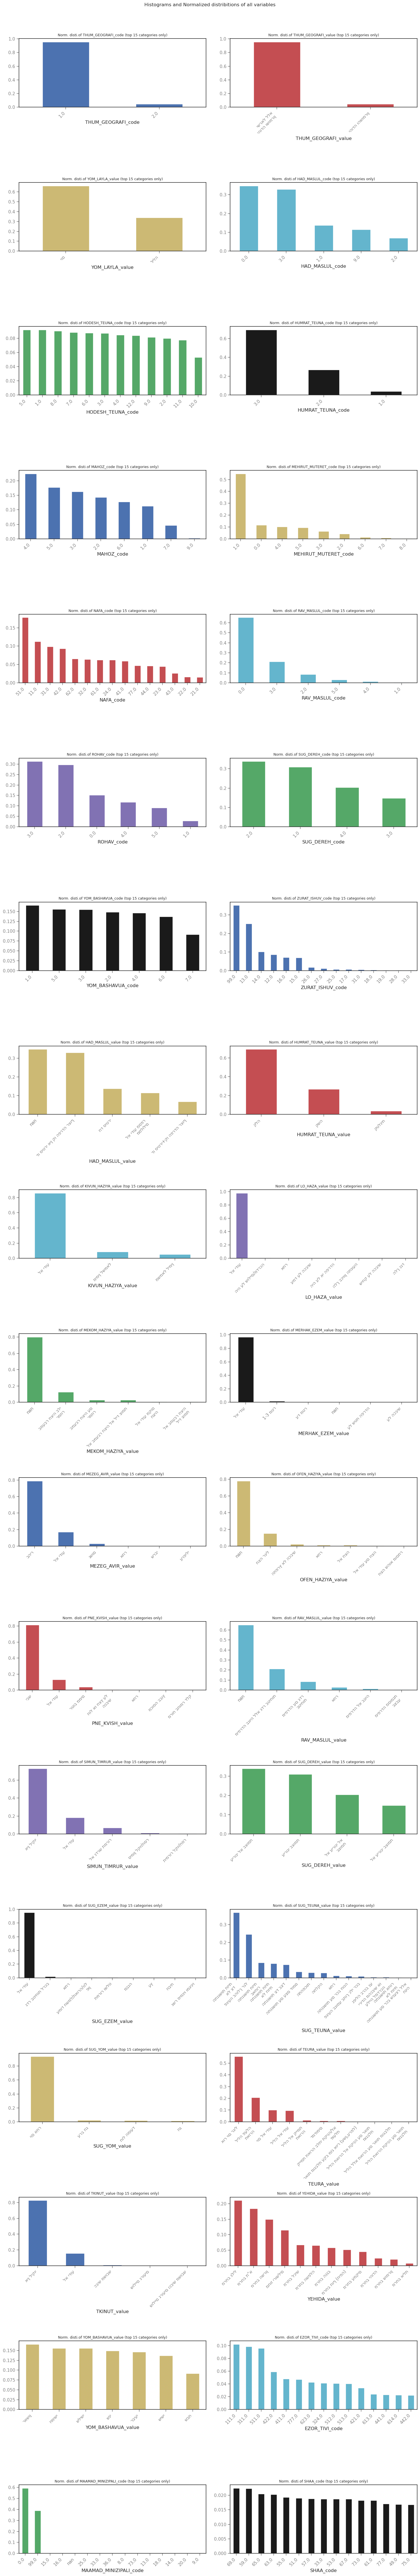

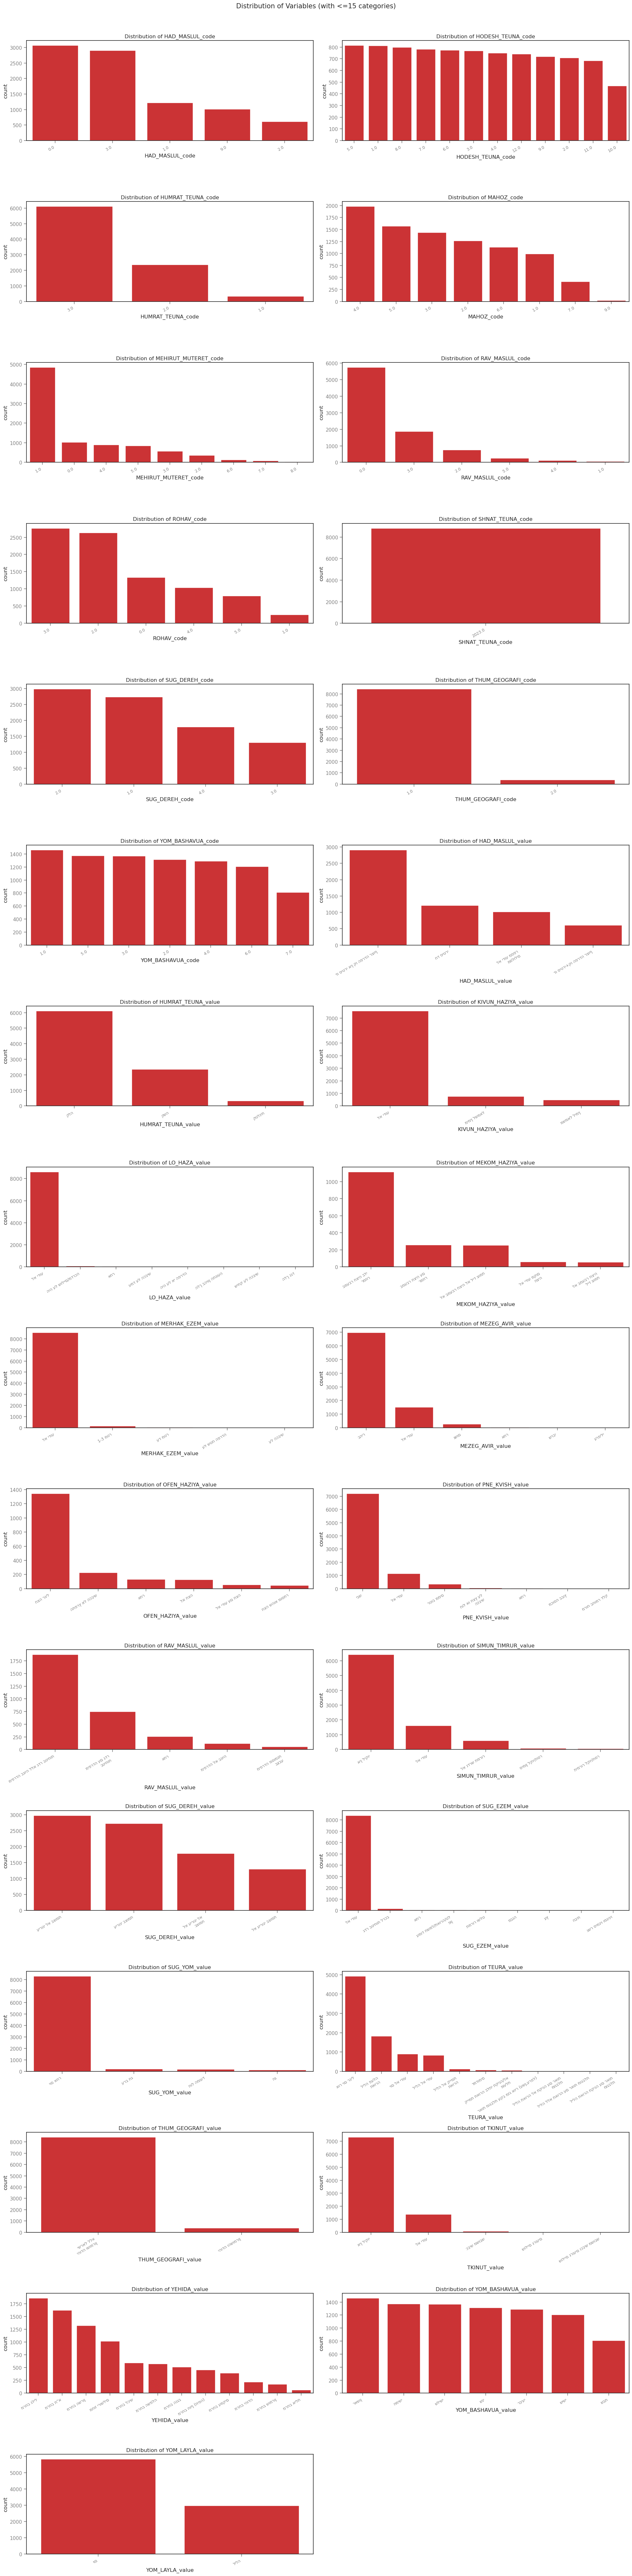

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

ValueError: Image size of 1500x157500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x157500 with 630 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica,

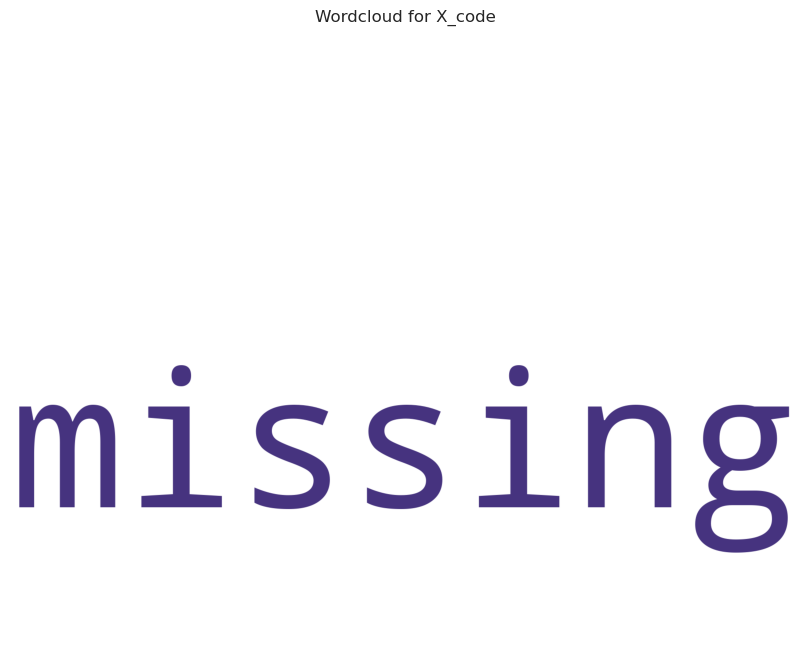

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica,

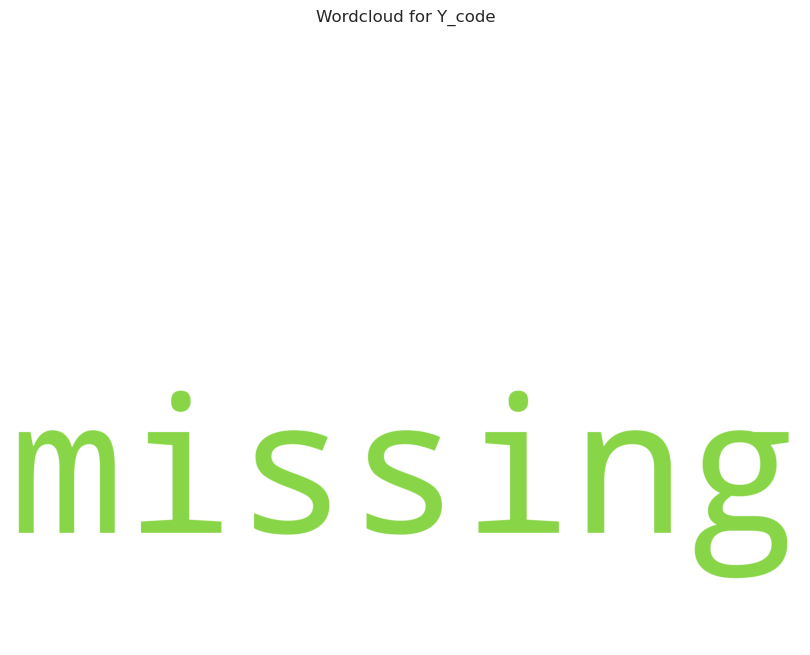

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica,

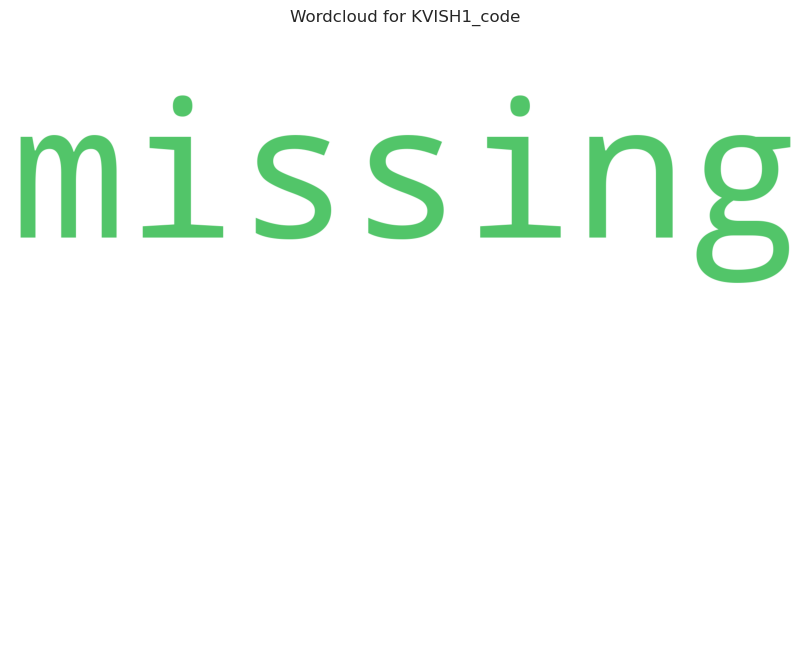

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica,

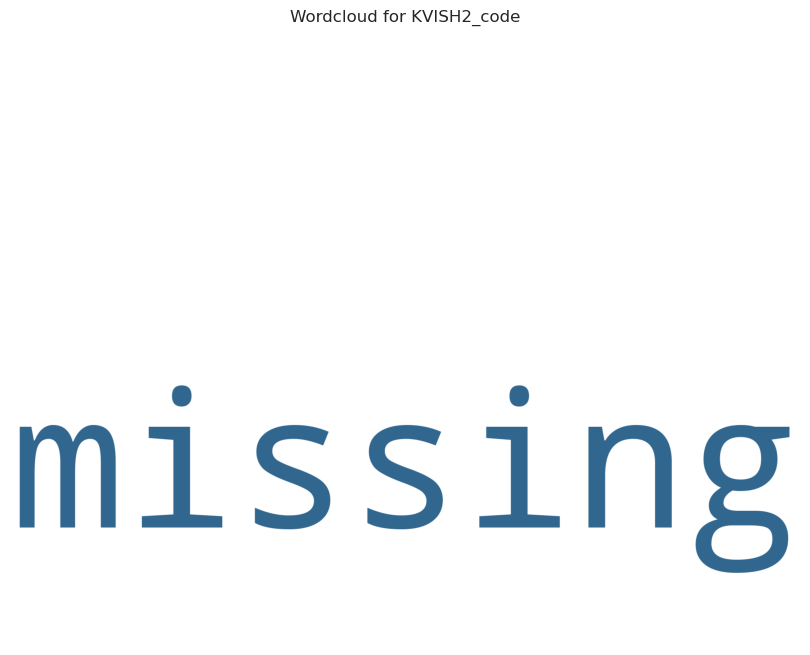

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica, Helvetica,

Could not draw wordcloud plot for SEMEL_YISHUV_code. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 84 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


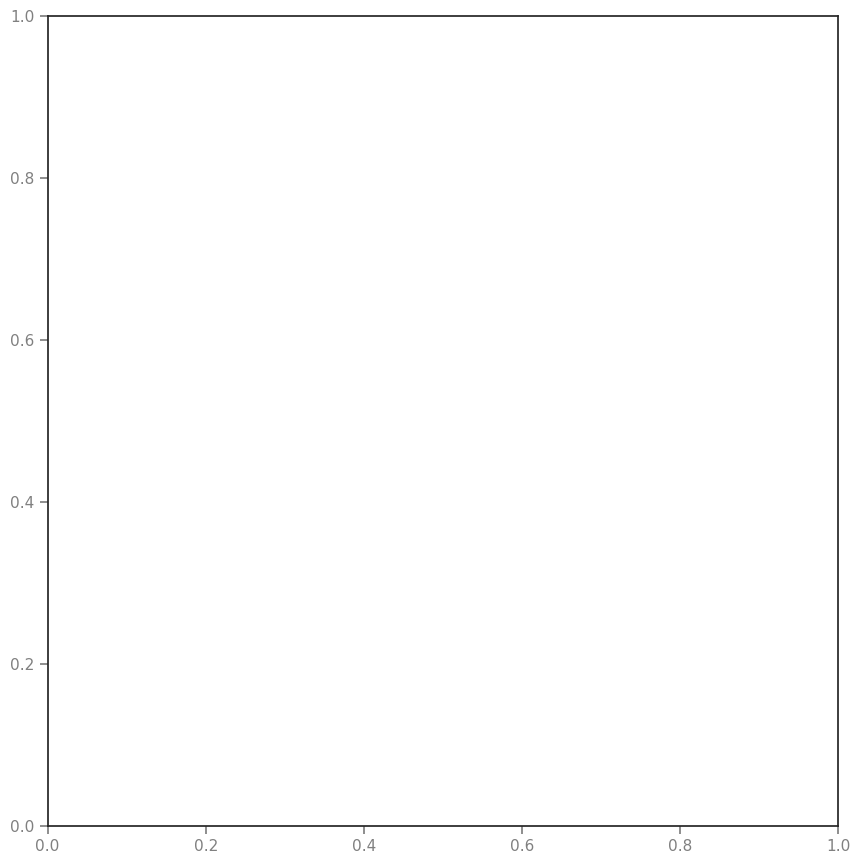

In [118]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
dfte = AV.AutoViz(data, header=0, verbose=1, lowess=False, chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=45, save_plot_dir=None)

### Remove meaningless columns or columns with lots of missing values

In [119]:
columns_to_drop = [
    'LO_HAZA_value',
    'KIVUN_HAZIYA_value',
    'MERHAK_EZEM_value',
    'MEKOM_HAZIYA_value',
    'OFEN_HAZIYA_value',
    'SUG_EZEM_value',
    'MAAMAD_MINIZIPALI_code',
    'SHNAT_TEUNA_code',
    'KVISH1_code',
    'KVISH2_code',
]

data = data.drop(columns=columns_to_drop)


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EZOR_TIVI_code        8832 non-null   object
 1   HAD_MASLUL_code       8832 non-null   object
 2   HODESH_TEUNA_code     8832 non-null   object
 3   HUMRAT_TEUNA_code     8832 non-null   object
 4   MAHOZ_code            8832 non-null   object
 5   MEHIRUT_MUTERET_code  8832 non-null   object
 6   NAFA_code             8832 non-null   object
 7   RAV_MASLUL_code       8832 non-null   object
 8   ROHAV_code            8832 non-null   object
 9   SEMEL_YISHUV_code     8832 non-null   object
 10  SHAA_code             8832 non-null   object
 11  SUG_DEREH_code        8832 non-null   object
 12  THUM_GEOGRAFI_code    8832 non-null   object
 13  X_code                8806 non-null   object
 14  Y_code                8806 non-null   object
 15  YOM_BASHAVUA_code     8832 non-null   

### Dealing with nans

In [121]:
data['HAD_MASLUL_value'] = data['HAD_MASLUL_value'].fillna("אין")
data['RAV_MASLUL_value'] = data['RAV_MASLUL_value'].fillna("אין")
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EZOR_TIVI_code        8806 non-null   object
 1   HAD_MASLUL_code       8806 non-null   object
 2   HODESH_TEUNA_code     8806 non-null   object
 3   HUMRAT_TEUNA_code     8806 non-null   object
 4   MAHOZ_code            8806 non-null   object
 5   MEHIRUT_MUTERET_code  8806 non-null   object
 6   NAFA_code             8806 non-null   object
 7   RAV_MASLUL_code       8806 non-null   object
 8   ROHAV_code            8806 non-null   object
 9   SEMEL_YISHUV_code     8806 non-null   object
 10  SHAA_code             8806 non-null   object
 11  SUG_DEREH_code        8806 non-null   object
 12  THUM_GEOGRAFI_code    8806 non-null   object
 13  X_code                8806 non-null   object
 14  Y_code                8806 non-null   object
 15  YOM_BASHAVUA_code     8806 non-null   objec

### Map accidents

In [122]:
data['X_code'] = data['X_code'].astype(float)
data['Y_code'] = data['Y_code'].astype(float)

In [123]:
#!pip install pyproj
import pandas as pd
from pyproj import Proj, transform

# Assuming your dataframe is called 'data' and has the columns 'X_code' and 'Y_code'

# Define the projection systems (Israeli Grid EPSG:2039 and WGS84 EPSG:4326)
proj_tamam = Proj(init='epsg:2039')  # Israeli Grid (Transverse Mercator)
proj_wgs84 = Proj(init='epsg:4326')  # WGS84 (Latitude/Longitude)

# Function to transform coordinates
def transform_coordinates(x, y):
    longitude, latitude = transform(proj_tamam, proj_wgs84, x, y)
    return latitude, longitude

# Apply the transformation to each row in the DataFrame
data[['latitude', 'longitude']] = data.apply(
    lambda row: pd.Series(transform_coordinates(row['X_code'], row['Y_code'])), axis=1
)

# Show the transformed DataFrame
print(data[['X_code', 'Y_code', 'latitude', 'longitude']].head())

    X_code    Y_code   latitude   longitude
0  183206.0  666306.0  32.089487  34.820444
1  190185.0  673239.0  32.152209  34.894160
2  179498.0  653490.0  31.973789  34.781698
3  209195.0  751807.0  32.861018  35.094812
4  223381.0  633927.0  31.798062  35.245884


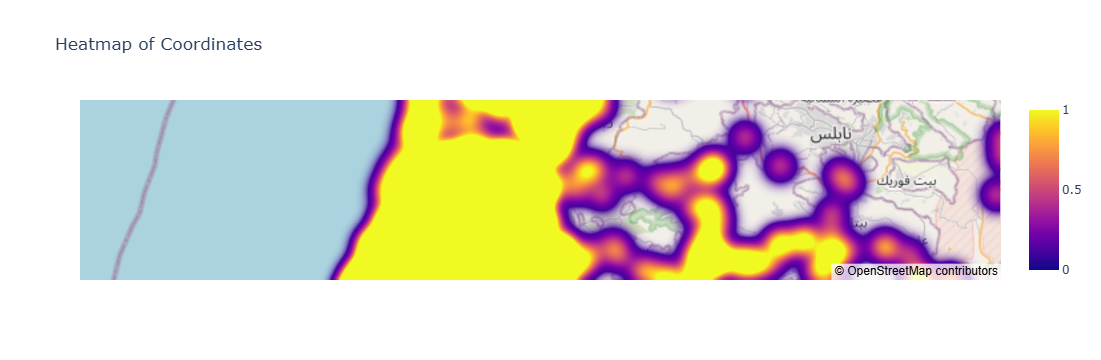

In [124]:
import plotly.express as px
import pandas as pd

# Create a heatmap using Plotly (you need a Mapbox access token for Mapbox)
fig = px.density_mapbox(data, lat='latitude', lon='longitude', 
                        hover_data=['latitude', 'longitude'], 
                        title='Heatmap of Coordinates')

# To display the map properly, set the Mapbox style
fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=10)

# Show the plot
fig.show()

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EZOR_TIVI_code        8806 non-null   object 
 1   HAD_MASLUL_code       8806 non-null   object 
 2   HODESH_TEUNA_code     8806 non-null   object 
 3   HUMRAT_TEUNA_code     8806 non-null   object 
 4   MAHOZ_code            8806 non-null   object 
 5   MEHIRUT_MUTERET_code  8806 non-null   object 
 6   NAFA_code             8806 non-null   object 
 7   RAV_MASLUL_code       8806 non-null   object 
 8   ROHAV_code            8806 non-null   object 
 9   SEMEL_YISHUV_code     8806 non-null   object 
 10  SHAA_code             8806 non-null   object 
 11  SUG_DEREH_code        8806 non-null   object 
 12  THUM_GEOGRAFI_code    8806 non-null   object 
 13  X_code                8806 non-null   float64
 14  Y_code                8806 non-null   float64
 15  YOM_BASHAVUA_code     8806

#### Choose YEHIDA as location feature, get rid of rest 

In [127]:
columns_to_drop = [
'EZOR_TIVI_code', 'MAHOZ_code', 'NAFA_code', 'SEMEL_YISHUV_code', 'X_code','Y_code','latitude','longitude','THUM_GEOGRAFI_code'
]

data = data.drop(columns=columns_to_drop)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HAD_MASLUL_code       8806 non-null   object
 1   HODESH_TEUNA_code     8806 non-null   object
 2   HUMRAT_TEUNA_code     8806 non-null   object
 3   MEHIRUT_MUTERET_code  8806 non-null   object
 4   RAV_MASLUL_code       8806 non-null   object
 5   ROHAV_code            8806 non-null   object
 6   SHAA_code             8806 non-null   object
 7   SUG_DEREH_code        8806 non-null   object
 8   YOM_BASHAVUA_code     8806 non-null   object
 9   ZURAT_ISHUV_code      8806 non-null   object
 10  HAD_MASLUL_value      8806 non-null   object
 11  HUMRAT_TEUNA_value    8806 non-null   object
 12  MEZEG_AVIR_value      8806 non-null   object
 13  PNE_KVISH_value       8806 non-null   object
 14  RAV_MASLUL_value      8806 non-null   object
 15  SIMUN_TIMRUR_value    8806 non-null   objec

In [129]:
columns_to_drop = [
'HAD_MASLUL_code','HUMRAT_TEUNA_code','RAV_MASLUL_code','SUG_DEREH_code','YOM_BASHAVUA_code',
]

data = data.drop(columns=columns_to_drop)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HODESH_TEUNA_code     8806 non-null   object
 1   MEHIRUT_MUTERET_code  8806 non-null   object
 2   ROHAV_code            8806 non-null   object
 3   SHAA_code             8806 non-null   object
 4   ZURAT_ISHUV_code      8806 non-null   object
 5   HAD_MASLUL_value      8806 non-null   object
 6   HUMRAT_TEUNA_value    8806 non-null   object
 7   MEZEG_AVIR_value      8806 non-null   object
 8   PNE_KVISH_value       8806 non-null   object
 9   RAV_MASLUL_value      8806 non-null   object
 10  SIMUN_TIMRUR_value    8806 non-null   object
 11  SUG_DEREH_value       8806 non-null   object
 12  SUG_TEUNA_value       8806 non-null   object
 13  SUG_YOM_value         8806 non-null   object
 14  TEURA_value           8806 non-null   object
 15  THUM_GEOGRAFI_value   8806 non-null   objec

#### Let's plot each feature against target feature

In [133]:
import matplotlib.pyplot as plt

# Set the default font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

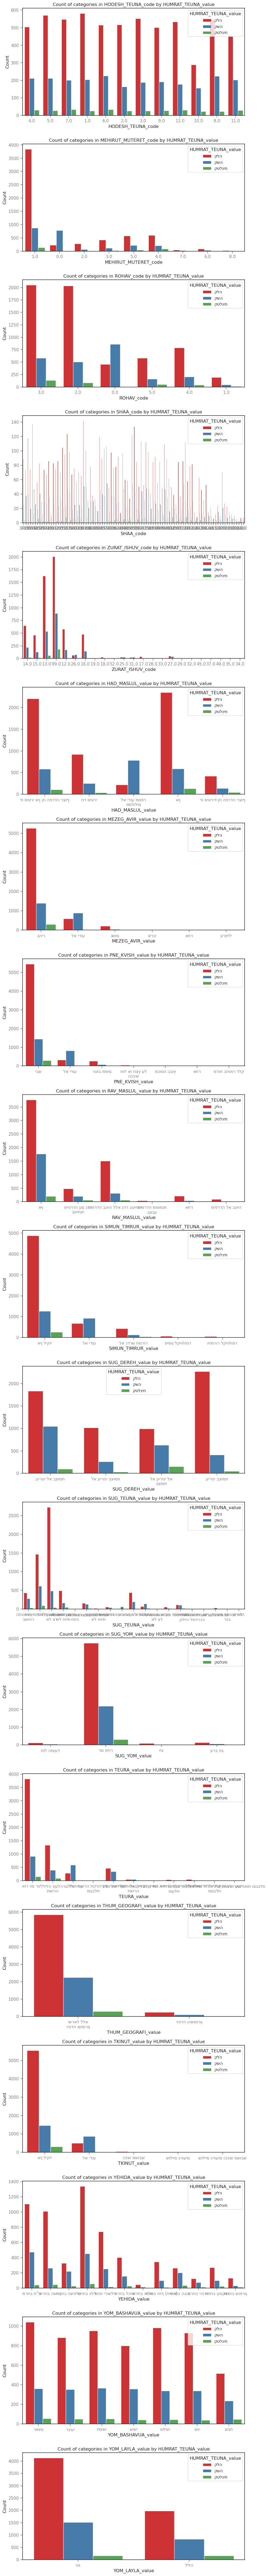

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns (excluding 'HUMRAT_TEUNA_value' as it's your y column)
columns = data.columns

# Filter out 'HUMRAT_TEUNA_value' from the columns to use only for x-axis plotting
x_columns = [col for col in columns if col != 'HUMRAT_TEUNA_value']

# Create a figure with subplots, number of plots equal to the length of x_columns
num_plots = len(x_columns)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# In case there's only one plot, 'axes' is not a list but a single Axes object
if num_plots == 1:
    axes = [axes]

# Loop over the columns and create plots
for i, column in enumerate(x_columns):
    sns.countplot(x=column, hue='HUMRAT_TEUNA_value', data=data, ax=axes[i])
    axes[i].set_title(f'Count of categories in {column} by HUMRAT_TEUNA_value')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


HUMRAT_TEUNA_value
קלה       0.694526
קשה       0.267545
קטלנית    0.037929
Name: proportion, dtype: float64


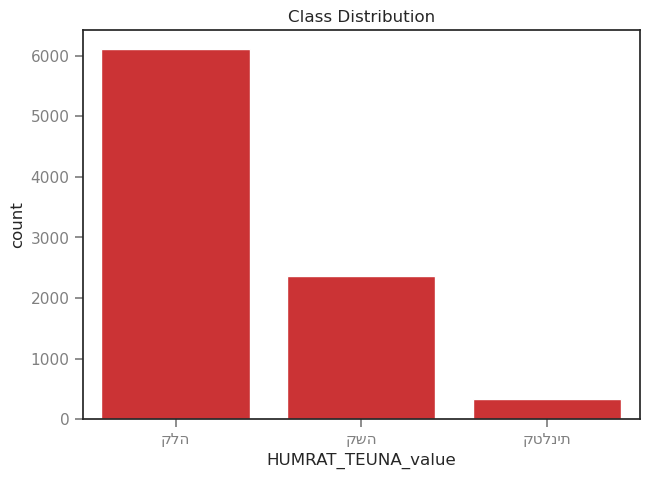

In [136]:
# Check class distribution
print(data['HUMRAT_TEUNA_value'].value_counts(normalize=True))

# Plot the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['HUMRAT_TEUNA_value'])
plt.title("Class Distribution")
plt.show()


#### Data is imbalanced! only 3 percent of data is קטלנית

# Feature Engineering

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


#### split train test with stratify because our data is imbalanced

In [137]:
X = data.drop(columns=['HUMRAT_TEUNA_value']) 
y = data['HUMRAT_TEUNA_value']  

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% of data for testing
    random_state=42,     # For reproducibility
    stratify=y           # Maintain class distribution
)

# Check class distribution in original data
print("Original class distribution:")
print(y.value_counts(normalize=True))

# Check class distribution in train data
print("\nTrain set class distribution:")
print(y_train.value_counts(normalize=True))

# Check class distribution in test data
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Original class distribution:
HUMRAT_TEUNA_value
קלה       0.694526
קשה       0.267545
קטלנית    0.037929
Name: proportion, dtype: float64

Train set class distribution:
HUMRAT_TEUNA_value
קלה       0.694492
קשה       0.267604
קטלנית    0.037905
Name: proportion, dtype: float64

Test set class distribution:
HUMRAT_TEUNA_value
קלה       0.694665
קשה       0.267310
קטלנית    0.038025
Name: proportion, dtype: float64


In [141]:
def prepare_data(data): 
    
    # One-hot encoding
    # Define the columns to exclude
    exclude_columns = ['HUMRAT_TEUNA_value', 'MEHIRUT_MUTERET_code']
    # Create a list of column names, excluding the specified columns
    categorical_columns = [col for col in data.columns if col not in exclude_columns]
    data = pd.get_dummies(data, columns=[col for col in categorical_columns if col in data.columns])  # One-hot encode categorical columns
    
    return data

In [148]:
data = prepare_data(data)

In [149]:
data

MEHIRUT_MUTERET_code HUMRAT_TEUNA_value  HODESH_TEUNA_code_1.0  \
0             1.0                 קלה                 False           
1             1.0                 קשה                 False           
2             0.0                 קשה                 False           
3             2.0                 קשה                  True           
4             1.0                 קלה                 False           
...                   ...                ...                    ...   
8827          1.0                 קלה                 False           
8828          1.0                 קלה                 False           
8829          1.0                 קלה                 False           
8830          6.0                 קשה                 False           
8831          4.0                 קשה                 False           

      HODESH_TEUNA_code_10.0  HODESH_TEUNA_code_11.0  HODESH_TEUNA_code_12.0  \
0              False                   False                   False           
1              False                   False                   False           
2              False                   False                   False           
3              False                   False                   False           
4              False                   False                   False           
...                      ...                     ...                     ...   
8827           False                   False                   False           
8828           False                   False                   False           
8829           False                   False                   False           
8830           False                   False                   False           
8831           False                   False                   False           

      HODESH_TEUNA_code_2.0  HODESH_TEUNA_code_3.0  HODESH_TEUNA_code_4.0  \
0             False                  False                   True           
1             False                  False                  False           
2             False                  False                  False           
3             False                  False                  False           
4             False                  False                  False           
...                     ...                    ...                    ...   
8827          False                  False                   True           
8828          False                  False                  False           
8829          False                  False                   True           
8830          False                  False                  False           
8831          False                  False                  False           

      HODESH_TEUNA_code_5.0  HODESH_TEUNA_code_6.0  HODESH_TEUNA_code_7.0  \
0             False                  False                  False           
1              True                  False                  False           
2             False                  False                   True           
3             False                  False                  False           
4             False                   True                  False           
...                     ...                    ...                    ...   
8827          False                  False                  False           
8828          False                  False                   True           
8829          False                  False                  False           
8830           True                  False                  False           
8831          False                  False                  False           

      HODESH_TEUNA_code_8.0  HODESH_TEUNA_code_9.0  ROHAV_code_0.0  \
0             False                  False               False       
1             False                  False               False       
2             False                  False                True       
3             False                  False               Fals

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = encoded.drop(columns=['HUMRAT_TEUNA_value'])  # Drop target column
y = encoded['HUMRAT_TEUNA_value']                # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.764472190692395

Confusion Matrix:
 [[   1   54   12]
 [   0 1180   44]
 [   0  305  166]]

Classification Report:
               precision    recall  f1-score   support

      קטלנית       1.00      0.01      0.03        67
         קלה       0.77      0.96      0.85      1224
         קשה       0.75      0.35      0.48       471

    accuracy                           0.76      1762
   macro avg       0.84      0.44      0.45      1762
weighted avg       0.77      0.76      0.72      1762



#### Resampling to fix imbalance

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd



# Step 2: Oversampling for "קטלנית"
smote = SMOTE(sampling_strategy={"קטלנית": int(y_train.value_counts()["קלה"] * 0.3)}, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Step 3: Undersampling for "קלה"
rus = RandomUnderSampler(sampling_strategy={"קלה": int(y_train.value_counts()["קשה"] * 1.1)}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_smote, y_smote)

# Step 4: Print the new class distribution
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())





Class distribution after resampling:
HUMRAT_TEUNA_value
קלה       2073
קשה       1885
קטלנית    1467
Name: count, dtype: int64


In [158]:
# Initialize a Random Forest Classifier
clf1 = RandomForestClassifier(random_state=42)

# Train the model
clf1.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf1.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7116912599318955

Confusion Matrix:
 [[   3   37   27]
 [  15 1007  202]
 [  10  217  244]]

Classification Report:
               precision    recall  f1-score   support

      קטלנית       0.11      0.04      0.06        67
         קלה       0.80      0.82      0.81      1224
         קשה       0.52      0.52      0.52       471

    accuracy                           0.71      1762
   macro avg       0.47      0.46      0.46      1762
weighted avg       0.70      0.71      0.70      1762

